In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

In [2]:
# Create Path to files

whalepath = Path("Resources/whale_returns.csv")
algopath = Path("Resources/algo_returns.csv")
sp500path = Path("Resources/sp500_history.csv")

In [98]:
# Read CSVs into a DataFrame

whale_df = pd.read_csv(whalepath, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df = pd.read_csv(algopath, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df = pd.read_csv(sp500path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [99]:
# Clean Whale DF (detect & remove nulls)

## Count Initial Nulls
whale_df.isnull().sum()

## Drop Nulls
whale_df = whale_df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)

## Count remaining nulls
whale_df.isnull().sum()

## Combine Whale DF

# Set weights
whale_weights = [0.25,0.25,0.25,0.25]

# Calculate portfolio return
whale_df = whale_df.dot(whale_weights)

whale_df = whale_df.to_frame()
# Display sample data
whale_column = ["Whale Portfolio"]
whale_df.columns = whale_column
whale_df

,Whale Portfolio
Date,
2015-03-03,-0.003328
2015-03-04,0.001788
2015-03-05,0.004293
2015-03-06,-0.008265
2015-03-09,0.002249
...,...
2019-04-25,-0.000470
2019-04-26,0.010025
2019-04-29,0.003862


In [100]:
# Clean Algo DF (detect & remove nulls)

## Initial Count Nulls
algo_df.isnull().sum()

## Drop Nulls
algo_df = algo_df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)

# Count remaining Nulls
algo_df.isnull().sum()

# Set weights
algo_weights = [0.5,0.5]

# Calculate portfolio return
algo_df = algo_df.dot(algo_weights)

algo_df = algo_df.to_frame()
# Display sample data
algo_column = ["Algo Portfolio"]
algo_df.columns = algo_column
algo_df

,Algo Portfolio
Date,
2014-06-05,0.008674
2014-06-06,0.005070
2014-06-09,0.000328
2014-06-10,0.001835
2014-06-11,0.000499
...,...
2019-04-25,-0.003282
2019-04-26,0.004118
2019-04-29,0.004019


In [6]:
# Remove '$' from S&P 500 column

sp500_df['Close'] = sp500_df['Close'].replace({'\$':''}, regex = True)

#Convert 'Close' column data to Float

sp500_df['Close'] = sp500_df['Close'].astype(float)

#Calculate S&P 500 daily returns

sp500_returns = sp500_df.pct_change()

sp500_returns.head()

# Clean S&P DF (detect & remove nulls)

## Initial Count Nulls
sp500_returns.isnull().sum()

## Drop Nulls
sp500_returns = sp500_returns.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)

## Count remaining nulls
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [7]:
# Rename S&P 500 Close column
# Set the `columns` attribute to a new list of column names
columns = ["S&P 500 Daily Returns"]
sp500_returns.columns = columns
sp500_returns.head()

,S&P 500 Daily Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [101]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_df, algo_df, sp500_returns], axis="columns", join="inner")
combined_returns

,Whale Portfolio,Algo Portfolio,S&P 500 Daily Returns
Date,,,
2015-03-03,-0.003328,-0.001446,0.004408
2015-03-04,0.001788,-0.003086,-0.001195
2015-03-05,0.004293,0.001684,0.014378
2015-03-06,-0.008265,-0.008209,-0.003929
2015-03-09,0.002249,-0.002072,0.017254
...,...,...,...
2019-04-15,-0.003168,-0.004451,-0.000509
2019-04-16,0.000773,-0.002023,0.002279
2019-04-17,-0.002638,-0.007765,-0.001577


<AxesSubplot:xlabel='Date'>

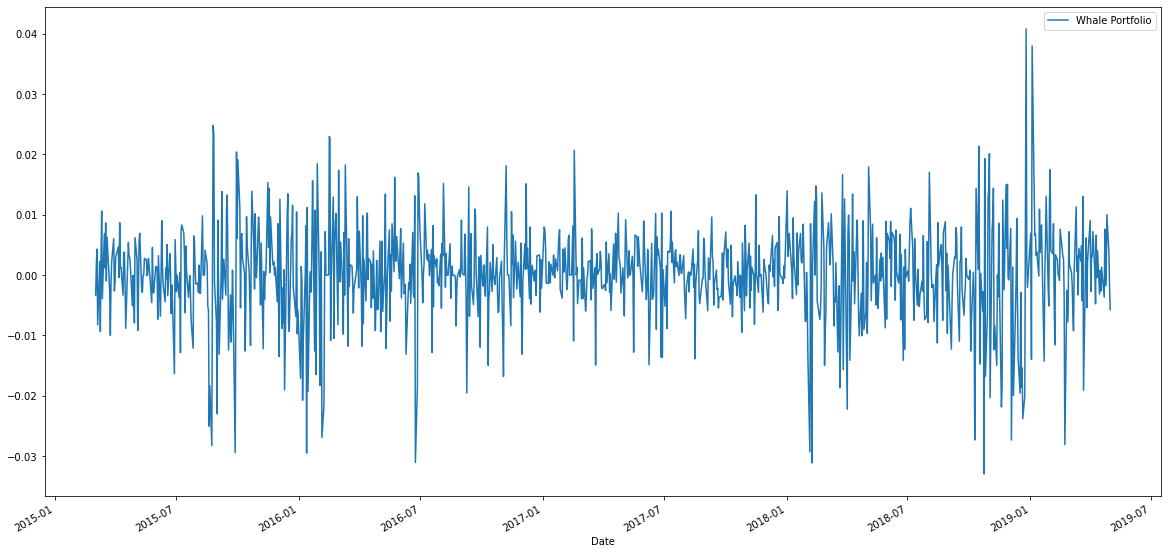

In [102]:
# Plot daily returns of all portfolios
whale_df.plot(figsize=(20,10))


<AxesSubplot:xlabel='Date'>

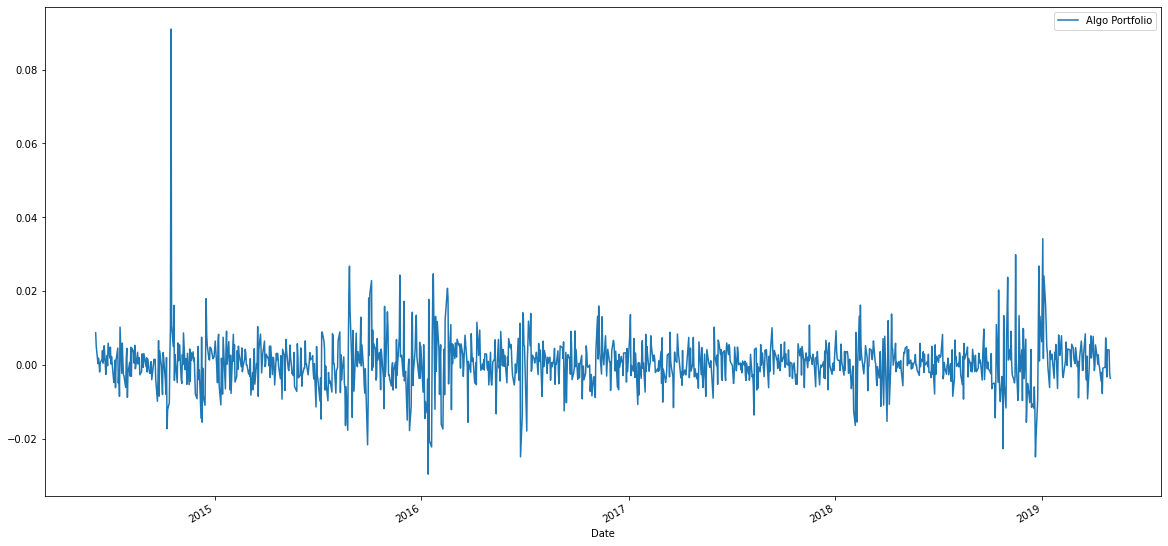

In [103]:
# Plot daily returns of all portfolios
algo_df.plot(figsize=(20,10))


<AxesSubplot:xlabel='Date'>

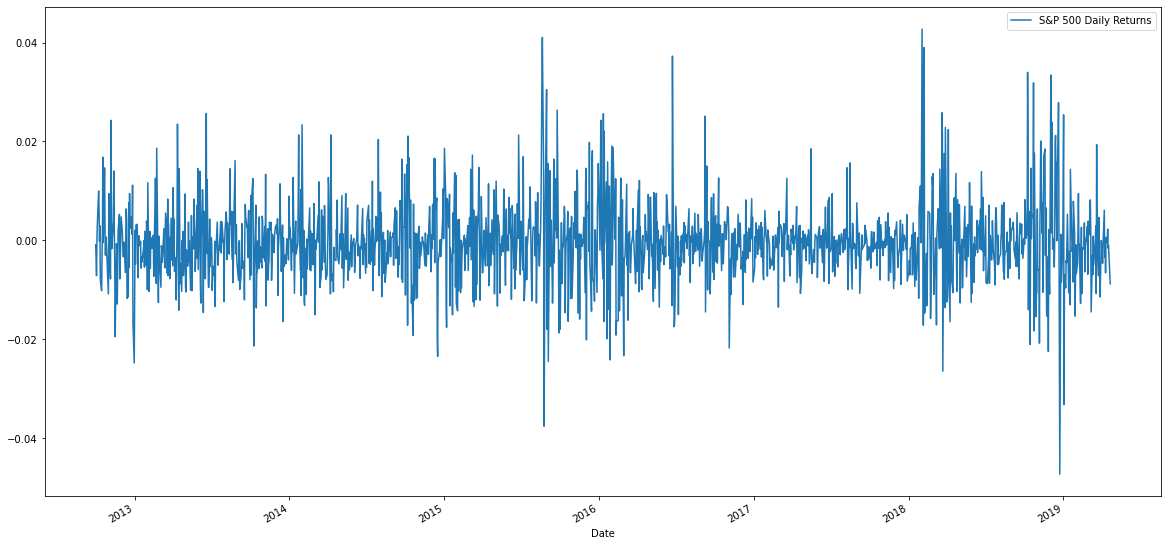

In [104]:
# Plot daily returns of all portfolios
sp500_returns.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

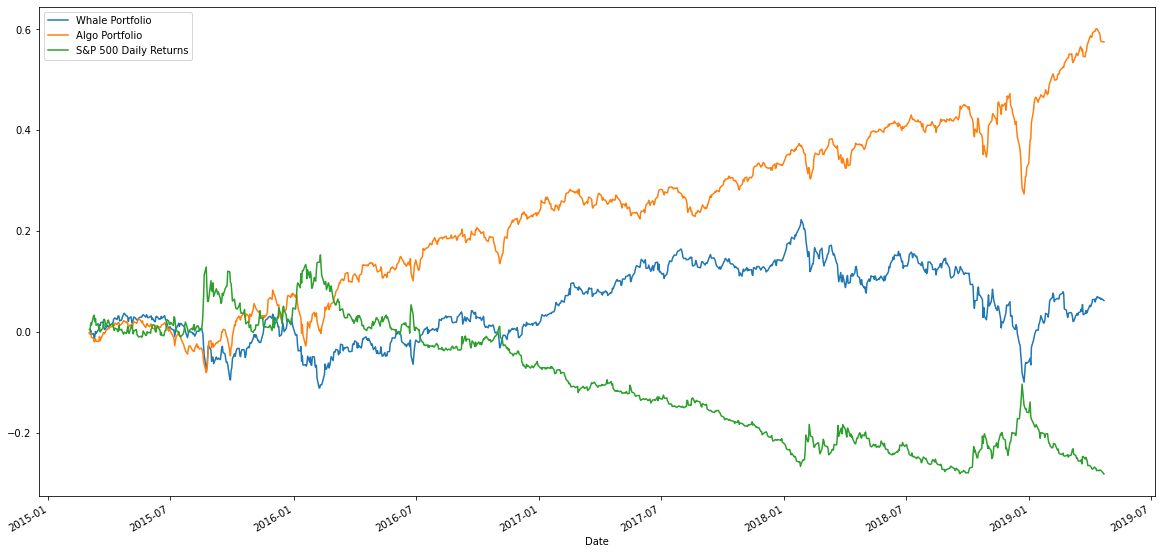

In [105]:
# Plot the cumulative Returns

cumulative_returns = (1 + combined_returns).cumprod() - 1
cumulative_returns.plot(figsize=(20,10))

<AxesSubplot:>

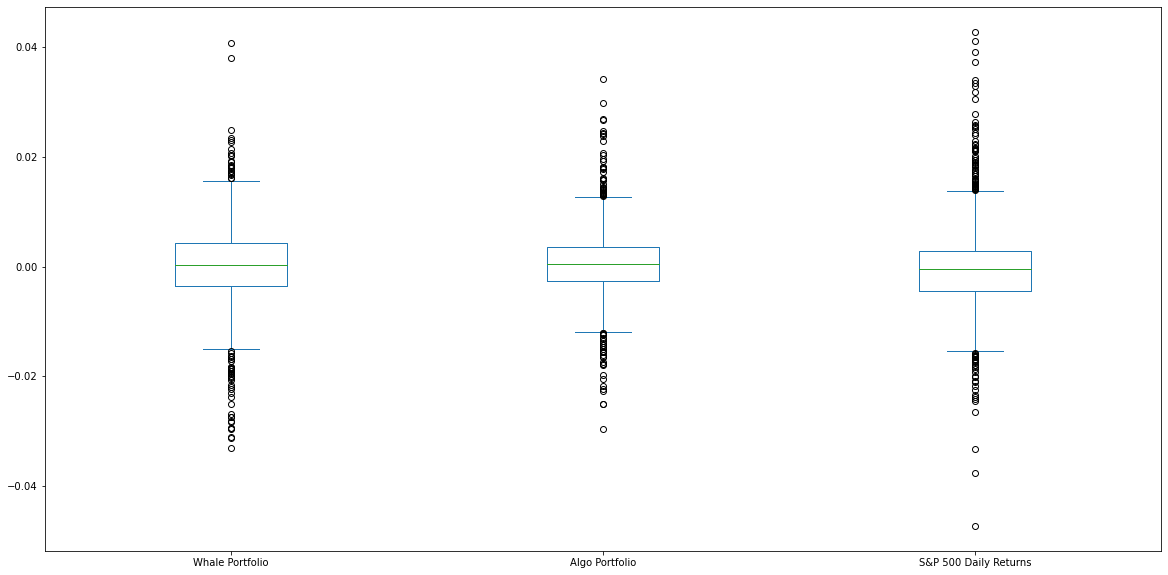

In [106]:
# Box plot to visually show risk

combined_returns.plot.box(figsize=(20,10))

In [107]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_returns.std()
combined_std

Whale Portfolio          0.007946
Algo Portfolio           0.006409
S&P 500 Daily Returns    0.008587
dtype: float64

In [108]:
### Determine which portfolias are riskier than the S&P 500
# Initialize List & Get list of Dataframe column index values
df_list = []

df_list = list(combined_std.index.values)

# Initialize & get S&P 500 index value from dataframe
sp_index = 0
sp_returns = 0.0

sp_index = df_list.index("S&P 500 Daily Returns")

# Assign S&P Standard Deviation for Risk comparison
sp_returns = (combined_std.iloc[sp_index])

# Iterate through Portfolio Standard deviations and compare to S&P 
for i in range(len(df_list)):
    if combined_std.iloc[i] < sp_returns:
        print(f"{df_list[i]} is less risky than the S&P 500.")
    elif combined_std.iloc[i] > sp_returns:
        print(f"{df_list[i]} is more risky than the S&P 500.")
    else:
        break
    

Whale Portfolio is less risky than the S&P 500.
Algo Portfolio is less risky than the S&P 500.


In [109]:
# Calculate the Annualized Standard Deviation

annualized_std = combined_std  * np.sqrt(252)
annualized_std

Whale Portfolio          0.126146
Algo Portfolio           0.101735
S&P 500 Daily Returns    0.136313
dtype: float64

In [110]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_returns.rolling(window=30).std()
rolling_std.tail(10)

,Whale Portfolio,Algo Portfolio,S&P 500 Daily Returns
Date,,,
2019-04-08,0.006612,0.004221,0.006672
2019-04-09,0.006502,0.004225,0.006681
2019-04-10,0.006454,0.004233,0.006643
2019-04-11,0.006361,0.004236,0.006635
2019-04-12,0.006384,0.004195,0.006575
2019-04-15,0.006430,0.004307,0.006561
2019-04-16,0.006413,0.004340,0.006428
2019-04-17,0.006296,0.004255,0.006162
2019-04-18,0.005985,0.004223,0.006119


<AxesSubplot:xlabel='Date'>

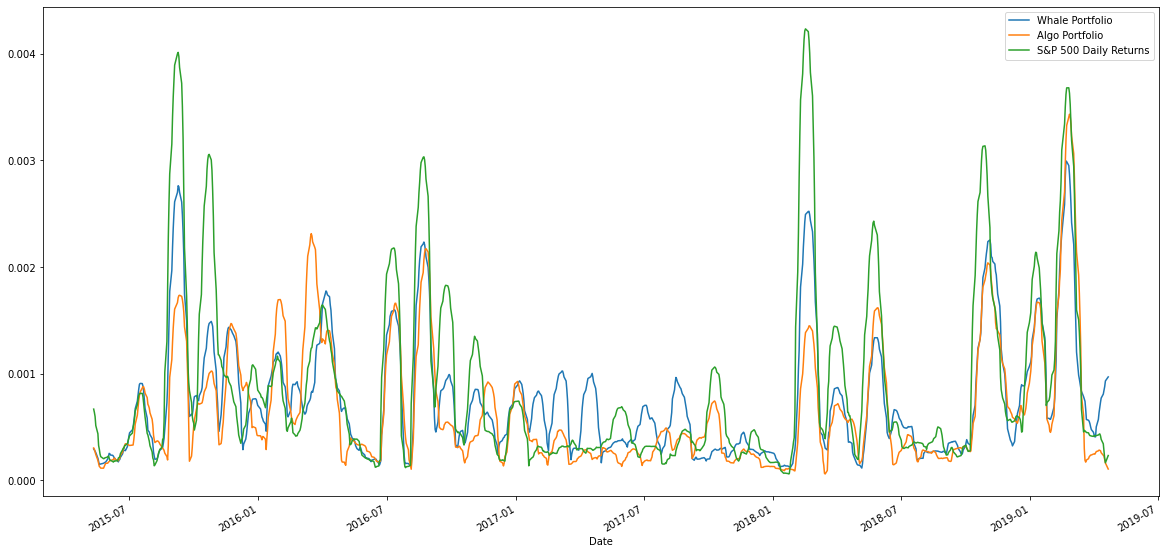

In [111]:
# Plot the rolling standard deviation
rolling_std.rolling(window=21).std().plot(figsize=(20,10))

In [112]:
# Calculate the correlation

corr_df = combined_returns.corr()
corr_df

,Whale Portfolio,Algo Portfolio,S&P 500 Daily Returns
Whale Portfolio,1.000000,0.712929,-0.003010
Algo Portfolio,0.712929,1.000000,-0.021625
S&P 500 Daily Returns,-0.003010,-0.021625,1.000000


<AxesSubplot:>

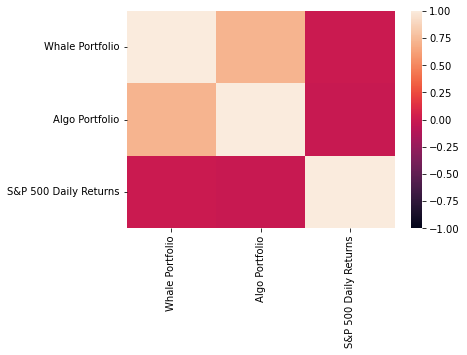

In [113]:
# Display de correlation matrix
sns.heatmap(corr_df, vmin=-1, vmax=1)

The covariance of Algo Portfolio is: -1.1900206026728182e-06
The variance of the S&P 500 Daily Returns is: 7.373467552840441e-05
The Beta of Algo Portfolio is: -0.016139226139462608


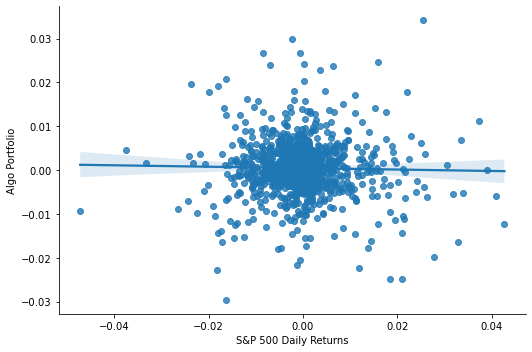

In [115]:
# Calculate covariance of a single portfolio
covariance = combined_returns["Algo Portfolio"].cov(combined_returns["S&P 500 Daily Returns"])
print(f"The covariance of Algo Portfolio is: {covariance}")
# Calculate variance of S&P 500
variance = combined_returns["S&P 500 Daily Returns"].var()
print(f"The variance of the S&P 500 Daily Returns is: {variance}")
# Computing beta
algo_beta = covariance / variance
print(f"The Beta of Algo Portfolio is: {algo_beta}")
# Plot beta trend
sns.lmplot(x='S&P 500 Daily Returns', y='Algo Portfolio', data=combined_returns, aspect=1.5, fit_reg=True)

In [116]:
# Use `ewm` to calculate the rolling window
combined_returns.ewm(halflife=21)

ExponentialMovingWindow [halflife=21,min_periods=1,adjust=True,ignore_na=False,axis=0]

In [117]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252)))
sharpe_ratios

Whale Portfolio          0.178530
Algo Portfolio           1.129704
S&P 500 Daily Returns   -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

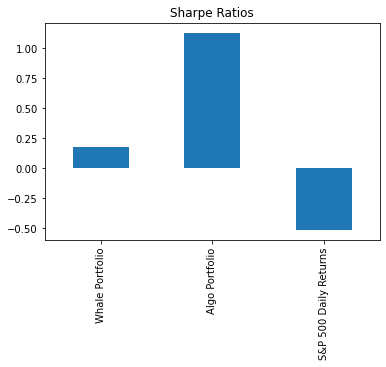

In [118]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [119]:
#Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
print("Algo Portfolio beat both the S&P 500 and the Whale portfolio.")

Algo Portfolio beat both the S&P 500 and the Whale portfolio.


In [40]:
# Reading data from 1st stock
applpath = Path("Resources/aapl_historical.csv")
googpath = Path("Resources/goog_historical.csv")

In [42]:
# Reading data from 2nd stock
my_df1 = pd.read_csv(applpath, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
my_df2 = pd.read_csv(googpath, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [48]:
# Combine all stocks in a single DataFrame

my_portfolio_df = pd.concat([my_df1, my_df2], axis="columns", join="inner")

# Reorganize portfolio data by having a column per symbol
my_portfolio_df.drop(columns=['Symbol', 'Symbol'], inplace=True)

my_portfolio_df.columns = ['AAPL', 'GOOG']
my_portfolio_df.head()

,AAPL,GOOG
Trade DATE,,
2019-05-09,200.72,1162.38
2019-05-08,202.90,1166.27
2019-05-07,202.86,1174.10
2019-05-06,208.48,1189.39
2019-05-03,211.75,1185.40


In [49]:
# Calculate daily returns
my_port_returns = my_portfolio_df.pct_change()
my_port_returns

,AAPL,GOOG
Trade DATE,,
2019-05-09,NaN,NaN
2019-05-08,0.010861,0.003347
2019-05-07,-0.000197,0.006714
2019-05-06,0.027704,0.013023
2019-05-03,0.015685,-0.003355
...,...,...
2018-05-17,0.003650,0.011469
2018-05-16,0.006364,0.002948
2018-05-15,-0.009246,-0.002348


In [50]:
# Drop NAs
my_port_returns = my_port_returns.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)

In [51]:
# Display sample data
my_port_returns

,AAPL,GOOG
Trade DATE,,
2019-05-08,0.010861,0.003347
2019-05-07,-0.000197,0.006714
2019-05-06,0.027704,0.013023
2019-05-03,0.015685,-0.003355
2019-05-02,-0.012279,-0.019226
...,...,...
2018-05-17,0.003650,0.011469
2018-05-16,0.006364,0.002948
2018-05-15,-0.009246,-0.002348


In [76]:
# Set weights
weights = [1/2, 1/2]

# Calculate portfolio return
my_combined_returns = my_port_returns.dot(weights)

my_combined_returns = my_combined_returns.to_frame()
# Display sample data


my_column = ["My Portfolio"]
my_combined_returns.columns = my_column
my_combined_returns

,My Portfolio
Trade DATE,
2019-05-08,0.007104
2019-05-07,0.003258
2019-05-06,0.020363
2019-05-03,0.006165
2019-05-02,-0.015752
...,...
2018-05-17,0.007559
2018-05-16,0.004656
2018-05-15,-0.005797


In [120]:
# Join your returns DataFrame to the original returns DataFrame

comparison_df = pd.concat([combined_returns, my_combined_returns], axis="columns", join="inner")
comparison_df


,Whale Portfolio,Algo Portfolio,S&P 500 Daily Returns,My Portfolio
2018-05-11,-0.001309,0.000319,-0.000883,0.000288
2018-05-14,0.000000,0.001275,0.006889,0.014301
2018-05-15,-0.004983,-0.001137,-0.004044,-0.005797
2018-05-16,0.006168,0.000507,0.000857,0.004656
2018-05-17,-0.002710,-0.000872,0.002639,0.007559
...,...,...,...,...
2019-04-15,-0.003168,-0.004451,-0.000509,-0.002507
2019-04-16,0.000773,-0.002023,0.002279,-0.013275
2019-04-17,-0.002638,-0.007765,-0.001577,-0.001803
2019-04-18,0.001292,-0.000909,-0.001011,-0.006631


In [121]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
comparison_df = comparison_df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)

In [122]:
# Calculate the annualized `std`
compare_std = comparison_df.std()
compare_annualized_std = compare_std  * np.sqrt(252)


<AxesSubplot:>

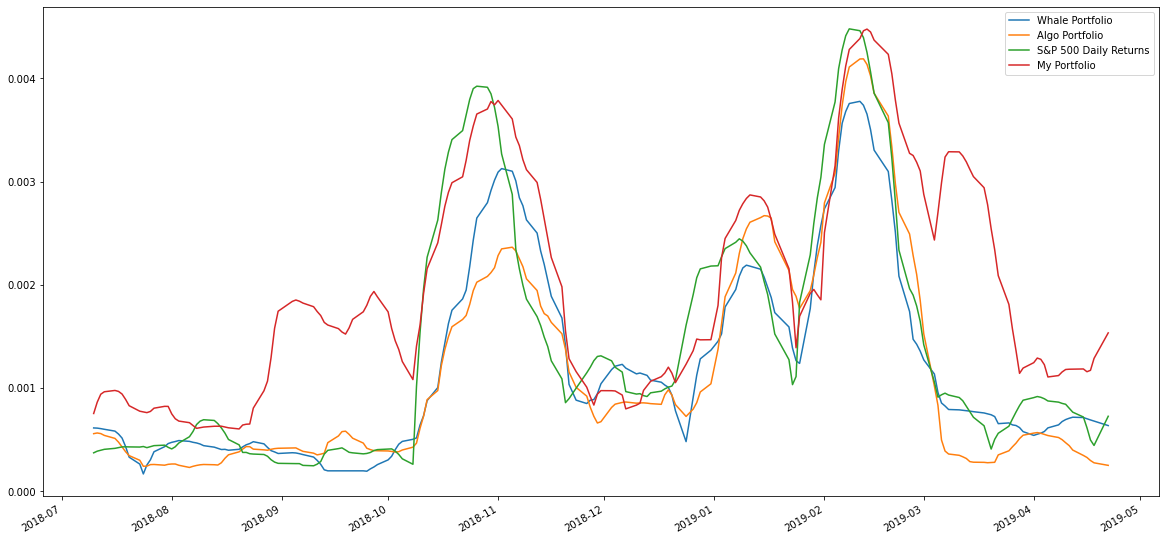

In [123]:
# Calculate rolling standard deviation
compare_rolling_std = comparison_df.rolling(window=21).std()
# Plot rolling standard deviation
compare_rolling_std.rolling(window=21).std().plot(figsize=(20,10))

<AxesSubplot:>

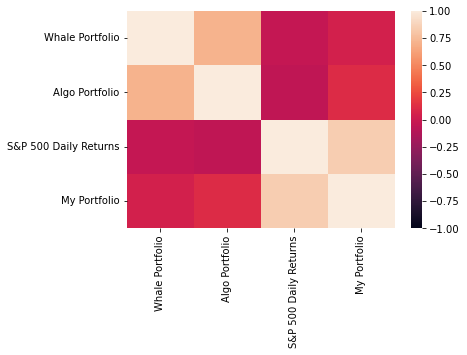

In [124]:
# Calculate and plot the correlation
combined_corr_df = comparison_df.corr()

sns.heatmap(combined_corr_df, vmin=-1, vmax=1)

In [125]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
my_covariance = comparison_df["My Portfolio"].cov(combined_returns["S&P 500 Daily Returns"])
print(f"The covariance of My Portfolio is: {my_covariance}")
# Calculate variance of S&P 500
variance = combined_returns["S&P 500 Daily Returns"].var()
print(f"The variance of the S&P 500 Daily Returns is: {variance}")
# Computing beta
my_beta = my_covariance / variance
print(f"The Beta of My Portfolio is: {my_beta}")
# Plot beta trend
sns.lmplot(x='S&P 500 Daily Returns', y="My Portfolio", data=combined_returns, aspect=1.5, fit_reg=True)

The covariance of My Portfolio is: 0.00012972518900472764
The variance of the S&P 500 Daily Returns is: 7.373467552840441e-05
The Beta of My Portfolio is: 1.7593511882310284


KeyError: "['My Portfolio'] not in index"

In [126]:
# Calculate Annualized Sharpe Ratios
# Annualized Sharpe Ratios
compare_sharpe_ratios = ((comparison_df.mean() * 252) / (comparison_df.std() * np.sqrt(252)))
compare_sharpe_ratios

Whale Portfolio         -0.239361
Algo Portfolio           1.191691
S&P 500 Daily Returns   -0.432942
My Portfolio            -0.340926
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

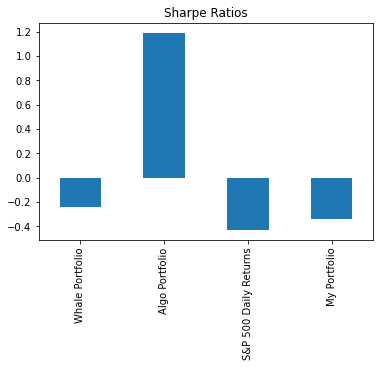

In [127]:
# Visualize the sharpe ratios as a bar plot
compare_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [129]:
#How did your portolio do?
print("My portfolio underpermored the Whale Portfolio and the Algo Portfolio, however, did beat the S&P 500.")

My portfolio underpermored the Whale Portfolio and the Algo Portfolio, however, did beat the S&P 500.
